# SET UP

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
transform = transforms.ToTensor()

In [25]:
train_data = datasets.CIFAR10(root = '../../Data', train = True, download = True, transform=transform)

Files already downloaded and verified


In [26]:
test_data = datasets.CIFAR10(root = '../../Data', train = False, download = True, transform=transform)

Files already downloaded and verified


In [27]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [28]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [29]:
# data loaders
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [30]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [31]:
for images, labels in train_loader:
    break

In [32]:
labels

tensor([3, 2, 0, 4, 9, 5, 1, 2, 4, 8])

Label: [3 2 0 4 9 5 1 2 4 8]
Class:    cat  bird plane  deer truck   dog   car  bird  deer  ship


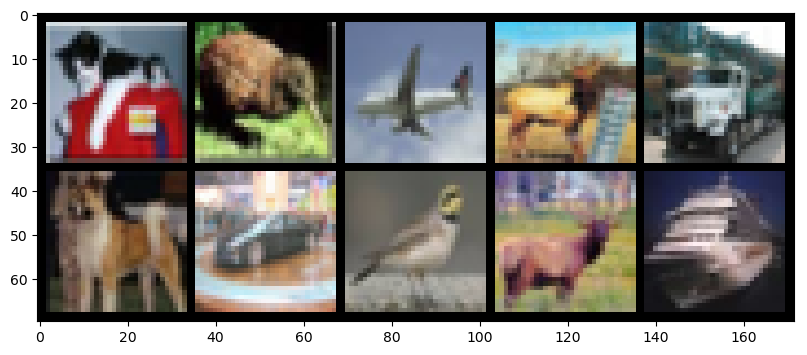

In [34]:
# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# print images
im = make_grid(images, nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [ ]:
class ConvolutionalNetwork(nn.Module): # this will be exactly the same as before but now we will now account for RGB
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,6,5,1) ## used to be 1,6,5,1
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.conv